# Togetherflow
**Emergent agent motion dynamics in immersive rooms**

In this notebook, we implement Togetherflow, a computational cognitive model that characterizes the motion pattern of human agents in immersive rooms.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numba import njit
from functools import partial

np.set_printoptions(suppress=True)

In [4]:
import tensorflow as tf
import bayesflow as bf
from bayesflow.simulation import Prior, Simulator, GenerativeModel

In [5]:
from initializations import initialize_agents, initialize_beacons
from influences import external_influence, internal_influence
from priors import complete_pooling_prior_fun
from diagnostics import plot_direction

## Initializations

In [6]:
agent_positions, agent_rotations = initialize_agents()
beacon_positions = initialize_beacons()

In [7]:
print(agent_positions.shape, agent_rotations.shape, beacon_positions.shape)

(12, 2) (12, 1) (10, 2)


## Influences

In [8]:
num_agents = len(agent_positions)
e = np.empty((num_agents, 2))
for i in range(num_agents):
    e[i] = external_influence(agent_positions[i], beacon_positions[0])

e

array([[-0.71673417, -0.69734651],
       [-0.87773985, -0.47913751],
       [-0.99808401,  0.06187323],
       [-0.99987185,  0.0160074 ],
       [-0.99209172, -0.12551516],
       [-0.75338775, -0.65757656],
       [-0.99886364, -0.04765938],
       [-0.99960363, -0.02815328],
       [-0.99588495, -0.09062664],
       [-0.88358957, -0.46826223],
       [-0.86887747, -0.49502715],
       [-0.52389932, -0.85178018]])

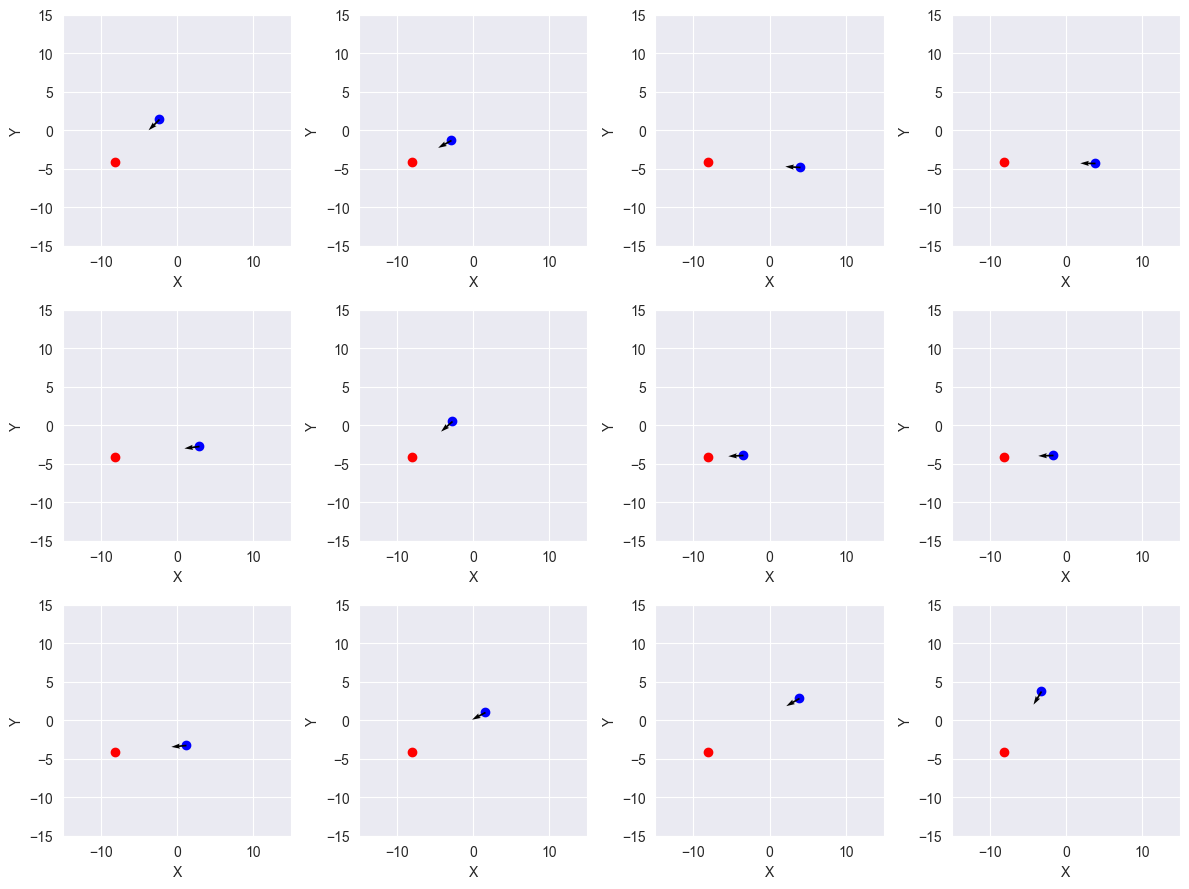

In [36]:
num_col = int(num_agents / 3)
num_row = 3

fig, axes = plt.subplots(num_row, num_col, figsize=(num_col * 3, num_row * 3))

for i, ax in enumerate(axes.flat):
    ax.scatter(x=agent_positions[i, 0], y=agent_positions[i, 1], c='b', marker='o')
    ax.scatter(x=beacon_positions[0, 0], y=beacon_positions[0, 1], c='r', marker='o') 
    
    ax.quiver(
        agent_positions[i, 0], agent_positions[i, 1],
        e[i, 0], e[i, 1], scale=0.5, angles='xy', scale_units='xy'
    )
    ax.set_xlim(-15., 15.)
    ax.set_ylim(-15., 15.)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    
fig.tight_layout()